In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('./words_by_nation.csv')
print('shape: {}'.format(df.shape))
df.head()

shape: (34692, 5)


,country,text,positive,count,size
0,Russia,room,False,1938,165
1,Russia,hotel,False,923,77
2,Russia,breakfast,False,558,46
3,Russia,small,False,411,33
4,Russia,one,False,304,24


In [20]:
neg_df = df.where(df['positive'] == False)
print('shape: {}'.format(neg_df.shape))

shape: (34692, 5)


In [57]:
neg_df = df.where(df['positive'] == False).groupby(
    'text').agg({'count': np.sum})
neg_df = neg_df.sort_values(by=['count'], ascending=False)
neg_df

,count
text,
room,210845.0
hotel,74706.0
breakfast,59234.0
small,49880.0
staff,40231.0
...,...
natural,1.0
navigate,1.0
ndsm,1.0


In [42]:
import pickle

# Load cached word count
with open('pos_words_by_nation.pickle', 'rb') as pickle_file:
    pos_words_by_nation_dict = pickle.load(pickle_file)

with open('neg_words_by_nation.pickle', 'rb') as pickle_file:
    neg_words_by_nation_dict = pickle.load(pickle_file)

print(len(pos_words_by_nation_dict.items()))
print(len(neg_words_by_nation_dict.items()))

224
222


In [71]:
pos_words_count_dict = dict()
neg_words_count_dict = dict()

for (country, words_count_dict) in pos_words_by_nation_dict.items():
    for (word, count) in words_count_dict.items():
        pos_words_count_dict[word] = pos_words_count_dict.get(word, 0) + count
        
for (country, words_count_dict) in neg_words_by_nation_dict.items():
    for (word, count) in words_count_dict.items():
        neg_words_count_dict[word] = neg_words_count_dict.get(word, 0) + count

print('[pos] after processing : {}'.format(len(pos_words_count_dict.items())))
print('[neg] after processing : {}'.format(len(neg_words_count_dict.items())))

[pos] after processing : 45351
[neg] after processing : 47199


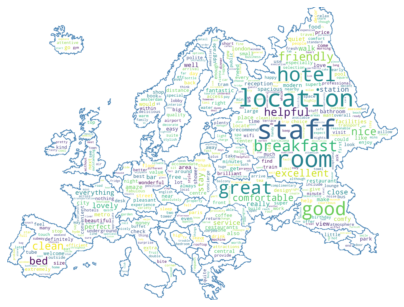

In [111]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open(path.join(d, "alice_mask.png")))
europe_mask = np.array(Image.open(path.join(d, "europe_mask.png")))
europe_mask2 = np.array(Image.open(path.join(d, "europe_mask2.png")))
europe_mask3 = np.array(Image.open(path.join(d, "europe_mask3.png")))
mask = europe_mask3

stopwords = set(STOPWORDS)
stopwords.add("said")

wc_pos = WordCloud(background_color="white", max_words=500, mask=mask,
               stopwords=stopwords, contour_width=2, contour_color='steelblue')

# generate word cloud
wc_pos.generate_from_frequencies(pos_words_count_dict)

plt.figure(figsize=[7,7])
plt.imshow(wc_pos, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

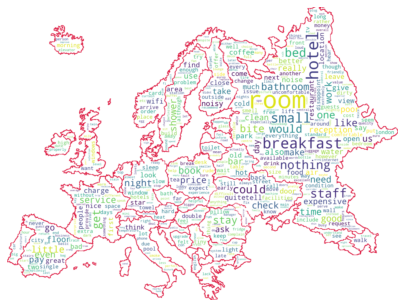

In [112]:
wc_neg = WordCloud(background_color="white", max_words=500, mask=mask,
               stopwords=stopwords, contour_width=2, contour_color='crimson')

# generate word cloud
wc_neg.generate_from_frequencies(neg_words_count_dict)

plt.figure(figsize=[7,7])
plt.imshow(wc_neg, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

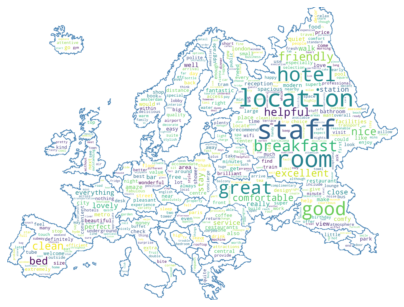

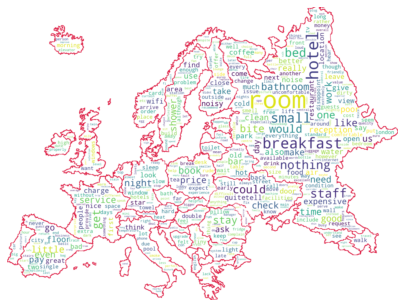

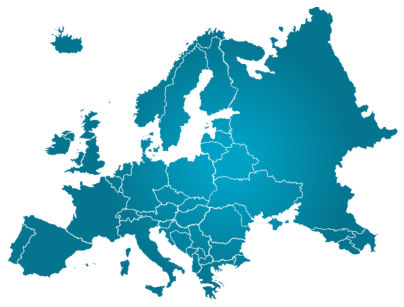

In [113]:
plt.figure(figsize=[7,7])
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[7,7])
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[7,7])
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

In [114]:
# Save to files
wc_pos.to_file(path.join(d, "wordcloud_pos.png"))
wc_neg.to_file(path.join(d, "wordcloud_neg.png"))